# Homework 1

## Part 1: Hand Calculations (50 points)

### Problem 1.1: Closed-Form Solution (10 points)
Find the minimum of \(f(x) = x^2 - 4x + 7\) using calculus.

\(f'(x) = 2x - 4\).

\(f'(x)=0\) 

\(=> x=2\). 

since\(f''(x)=2>0\), this is a minimum. The minimum value is \(f(2)=3\).

### Problem 1.2: Gradient Descent by Hand (20 points)
Use gradient descent to find the minimum of \(f(x) = x^2 - 4x + 7\) starting from \(x_0=0\) with learning rate \(\alpha = 0.1\).

Update rule: \(x_{n+1} = x_n - \alpha f'(x_n)\), with \(f'(x)=2x-4\).

| iteration (n) | \(x_n\) | \(f'(x_n)\) | \(f(x_n)\) |
|---:|---:|---:|---:|
| 0 | 0.00000 | -4.00000 | 7.00000 |
| 1 | 0.40000 | -3.20000 | 5.56000 |
| 2 | 0.72000 | -2.56000 | 4.63840 |
| 3 | 0.97600 | -2.04800 | 4.04858 |
| 4 | 1.18080 | -1.63840 | 3.67109 |
| 5 | 1.34464 | -1.31072 | 3.42950 |

After 5 iterations, \(x_5 = 1.34464\). The true minimum is at \(x=2\), so the distance to the minimizer is \(|1.34464-2|=0.65536\).

The sign of \(f'(x_n)\) tells the direction to move (negative means move right, positive means move left). The magnitude \(|f'(x_n)|\) scales the step size so that when the slope is steep (far from the minimum), we take larger steps, and when the slope is small (near the minimum), we take smaller steps for stability.

### Problem 1.3: Introducing Cost Functions - Fence Optimization (20 points)
A farmer wants to build a rectangular fence to enclose exactly 1 acre (\(43{,}560\) ft\(^2\)). Fencing costs $8 per foot.

**Derive the cost function**
- Area constraint: \(LW = 43{,}560\), so \(W = \frac{43{,}560}{L}\).
- Perimeter: \(P(L) = 2L + 2W = 2L + \frac{87{,}120}{L}\).
- Cost function: \(C(L) = 8P(L) = 16L + \frac{16\cdot 43{,}560}{L}\).
- Domain: \(L>0\).

**Find the minimum cost (closed-form)**
\(C'(L)=16 - \frac{16\cdot 43{,}560}{L^2}\). Setting \(C'(L)=0\) gives \(L^2=43{,}560\), so
\(L=\sqrt{43{,}560}\approx 208.71\) ft and \(W=\frac{43{,}560}{L}=\sqrt{43{,}560}\approx 208.71\) ft.

Minimum total cost:
\(C(\sqrt{43{,}560})\approx \$6{,}678.73\).

**Observation:** The optimal fence is a square (length equals width).


In [6]:
import numpy as np
import numpy.polynomial as poly
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd


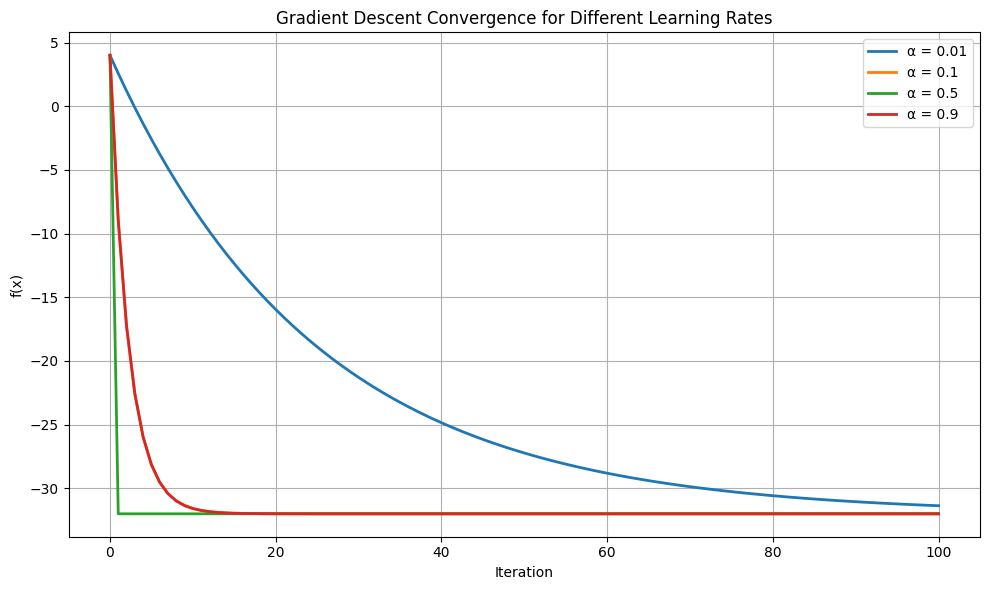

α = 0.01 | final x = 5.2042826646 | final f(x) = -31.3668339222
α = 0.10 | final x = 5.9999999988 | final f(x) = -32.0000000000
α = 0.50 | final x = 6.0000000000 | final f(x) = -32.0000000000
α = 0.90 | final x = 5.9999999988 | final f(x) = -32.0000000000


In [7]:

def gradient_descent(coef, x_start, learning_rate, num_iterations):
    """
    f: function to minimize
    df: derivative of f
    x_start: starting point
    learning_rate: step size
    num_iterations: number of iterations to run
    
    Returns: (x_history, f_history) - lists of x values and f(x) values
    """
    # Your implementation here
    # delete this and the following line in your implementation. (do not delete the return)
    f = poly.Polynomial(coef)
    df = f.deriv()
    x_history = [x_start]
    f_history = [f(x_start)]

    x = x_start
    for i in range(num_iterations):
        x -= learning_rate * float(df(x))
        x_history.append(float(x))
        f_history.append(float(f(x)))

    return x_history, f_history


# function2(x) = x^2 - 12x + 4
coef_f2 = [4, -12, 1]
learning_rates = [0.01, 0.1, 0.5, 0.9]

plt.figure(figsize=(10, 6))

results = {}
for lr in learning_rates:
    x_hist, f_hist = gradient_descent(coef_f2, x_start=0.0, learning_rate=lr, num_iterations=100)
    results[lr] = (x_hist, f_hist)
    plt.plot(range(len(f_hist)), f_hist, linewidth=2, label=f"α = {lr}")

plt.xlabel("Iteration")
plt.ylabel("f(x)")
plt.title("Gradient Descent Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print final values again for convenience
for lr in learning_rates:
    x_hist, f_hist = results[lr]
    print(f"α = {lr:0.2f} | final x = {x_hist[-1]:.10f} | final f(x) = {f_hist[-1]:.10f}")




**Questions to answer:**
- **Which learning rate converges fastest?** \(\alpha=0.5\) converges fastest because it moves directly to the minimum for this quadratic.
- **What happens with \(\alpha=0.9\)? Why?** It still converges but oscillates around the minimum due to a large step size; the update overshoots each time but shrinks because \(\alpha<1\).
- **What would you expect with \(\alpha=1.1\)?** Divergence/oscillation with growing magnitude because \(\alpha>1\) is too large for this quadratic (step size amplifies errors).
- **Iterations to within 0.01 of the true minimum with \(\alpha=0.1\):** About 29 iterations (starting from \(x_0=0\)).


## Part 3: Analysis and Visualization

### Problem 3.1: Convergence Visualization


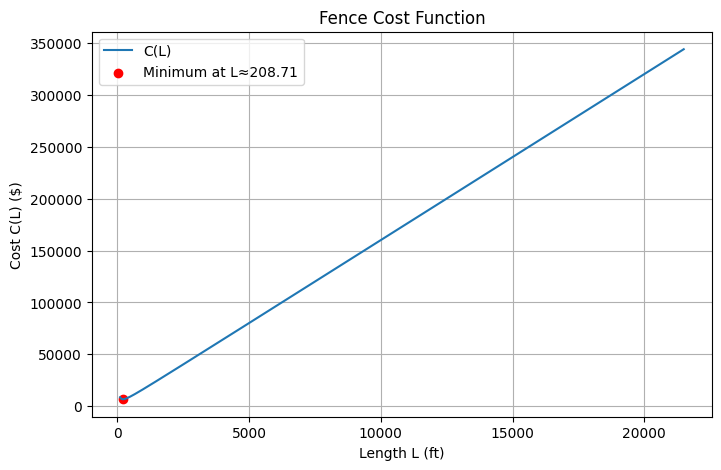

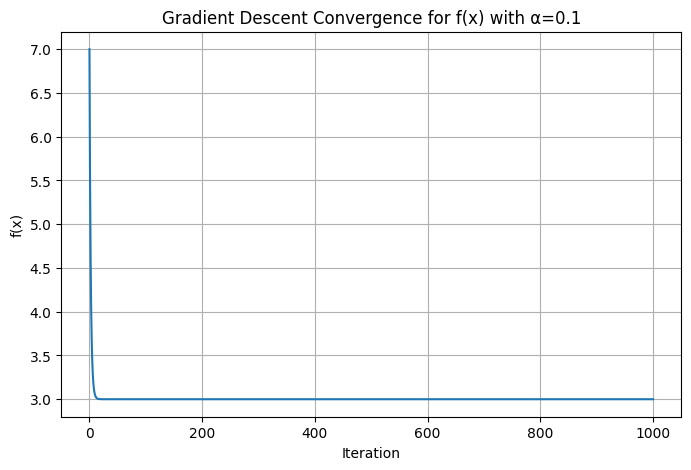

24

In [8]:
# Fence cost function plot
def fence_cost(L):
    return 16 * L + (16 * 43560) / L

L_vals = np.linspace(100, 21500, 500)
C_vals = fence_cost(L_vals)

L_opt = np.sqrt(43560)
C_opt = fence_cost(L_opt)

plt.figure(figsize=(8, 5))
plt.plot(L_vals, C_vals, label='C(L)')
plt.scatter([L_opt], [C_opt], color='red', label=f'Minimum at L≈{L_opt:.2f}')
plt.title('Fence Cost Function')
plt.xlabel('Length L (ft)')
plt.ylabel('Cost C(L) ($)')
plt.legend()
plt.grid(True)
plt.show()

# Convergence plot for f(x) = x^2 - 4x + 7 with α=0.1 over 1000 iterations
coef_f1 = [7, -4, 1]
x_hist_1000, f_hist_1000 = gradient_descent(coef_f1, x_start=0, learning_rate=0.1, num_iterations=1000)
plt.figure(figsize=(8, 5))
plt.plot(f_hist_1000)
plt.title('Gradient Descent Convergence for f(x) with α=0.1')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Iterations to within 0.01 of the true minimum (x=2)
f_poly = poly.Polynomial(coef_f1)
df_poly = f_poly.deriv()
x = 0
alpha = 0.1
iter_within = None
for i in range(1000):
    if abs(x - 2) < 0.01:
        iter_within = i
        break
    x = x - alpha * float(df_poly(x))
iter_within


**Iterations to reach within 0.01 of the true minimum (\(x=2\)) with \(\alpha=0.1\):** 24 iterations (starting from \(x_0=0\)).

### Problem 3.2: Reflection Questions
- **When might iterative methods be necessary?** 
When a closed-form derivative solution is unavailable, too expensive to compute, or the objective is high-dimensional/non-convex (common in machine learning). Iterative methods scale to large datasets and models.

- **What role does the learning rate play?** 
 too small means slow convergence, too large causes oscillation or divergence.
